<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/mobile2.png?raw=true" width=800 align="left"/>

# 실습 내용

- Grid Search로 Decision Tree 알고리즘 모델을 튜닝합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [4]:
# 기술통계 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,0.492600
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,0.499958
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,0.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [5]:
# 제거 대상: id
del_cols = ['id']

# 변수 제거
data.drop(del_cols, axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


**2) x, y 분리**

In [9]:
# Target 설정
target = 'CHURN'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**3) 가변수화**

In [10]:
# 가변수화 대상: REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
dum_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
x = pd.get_dummies(x, dum_cols, drop_first=True, dtype=int)

# 확인
x

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,153252,0,23,368403,597,1,6,0,0,1,0,0,1,0,0,0,0,0,0
19996,1,107126,71,82,237397,609,5,2,0,0,1,0,0,0,0,1,0,0,1,0
19997,0,78529,0,66,172589,275,0,2,0,1,0,0,0,0,1,0,1,0,0,0
19998,0,78674,47,41,572406,288,4,2,0,0,0,1,0,1,0,0,1,0,0,0


**4) 학습용, 평가용 데이터 분리**

In [11]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.3, random_state=1)

# 4.성능 예측

- k-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

In [16]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
# 선언하기
tree_model = DecisionTreeClassifier(random_state=1)

In [14]:
# 성능예측
cv_score = cross_val_score(tree_model, x_train, y_train, cv=10, scoring='accuracy')

In [15]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.61142857 0.60857143 0.63285714 0.62071429 0.61642857 0.60714286
 0.64214286 0.61       0.61928571 0.61785714]
0.6186428571428573


# 5.모델 튜닝


- Grid Search로 튜닝을 진행합니다.

**1) 모델 튜닝**

In [17]:
# 파라미터 선언
  # max_depth: range(1, 51)
param = {'max_depth': range(1, 51)}

# Grid Search 선언
  # cv=5
  # scoring='accuracy'
model = GridSearchCV(tree_model, param, cv=5, scoring='accuracy')

In [18]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

**2) 결과 확인**

In [23]:
model.cv_results_

{'mean_fit_time': array([0.0218852 , 0.02720966, 0.04167171, 0.05092812, 0.06280303,
        0.08188868, 0.09496932, 0.10752296, 0.13856802, 0.17498059,
        0.17613139, 0.19339314, 0.21471748, 0.2171381 , 0.24440713,
        0.26684957, 0.27170687, 0.26792345, 0.28121386, 0.32665586,
        0.30698953, 0.31386418, 0.3292789 , 0.32980809, 0.30141602,
        0.32782745, 0.32348104, 0.3040226 , 0.32327695, 0.30179558,
        0.32914228, 0.33518896, 0.32088199, 0.3345974 , 0.31418076,
        0.31874332, 0.33913269, 0.33725228, 0.31459084, 0.3427525 ,
        0.30659466, 0.31707573, 0.31313105, 0.31002951, 0.32776265,
        0.31181417, 0.31529574, 0.34856229, 0.34643893, 0.32066727]),
 'std_fit_time': array([0.00200302, 0.0009385 , 0.00083862, 0.00141632, 0.00141151,
        0.01250254, 0.0176425 , 0.00774335, 0.00936153, 0.02275327,
        0.01606806, 0.01353057, 0.01688425, 0.00652178, 0.01970417,
        0.03009783, 0.02574716, 0.01632045, 0.01714204, 0.03494765,
        0.020

In [25]:
# mean_test_score 확인
print(model.cv_results_['mean_test_score'])

[0.61735714 0.656      0.68907143 0.69964286 0.69614286 0.69792857
 0.6975     0.69428571 0.68814286 0.67807143 0.67421429 0.66971429
 0.6565     0.65478571 0.652      0.64521429 0.63871429 0.63842857
 0.63185714 0.62857143 0.62614286 0.62371429 0.62128571 0.61685714
 0.61871429 0.617      0.61828571 0.62028571 0.61464286 0.62071429
 0.61307143 0.61664286 0.61464286 0.61721429 0.61642857 0.61535714
 0.61771429 0.61657143 0.61728571 0.618      0.6175     0.61871429
 0.61871429 0.61535714 0.617      0.61871429 0.61914286 0.61414286
 0.61785714 0.61807143]


In [21]:
# 최적 파라미터
print(model.best_params_)

{'max_depth': 4}


In [22]:
# 최고 성능
print(model.best_score_)

0.6996428571428571


**3) 변수 중요도**

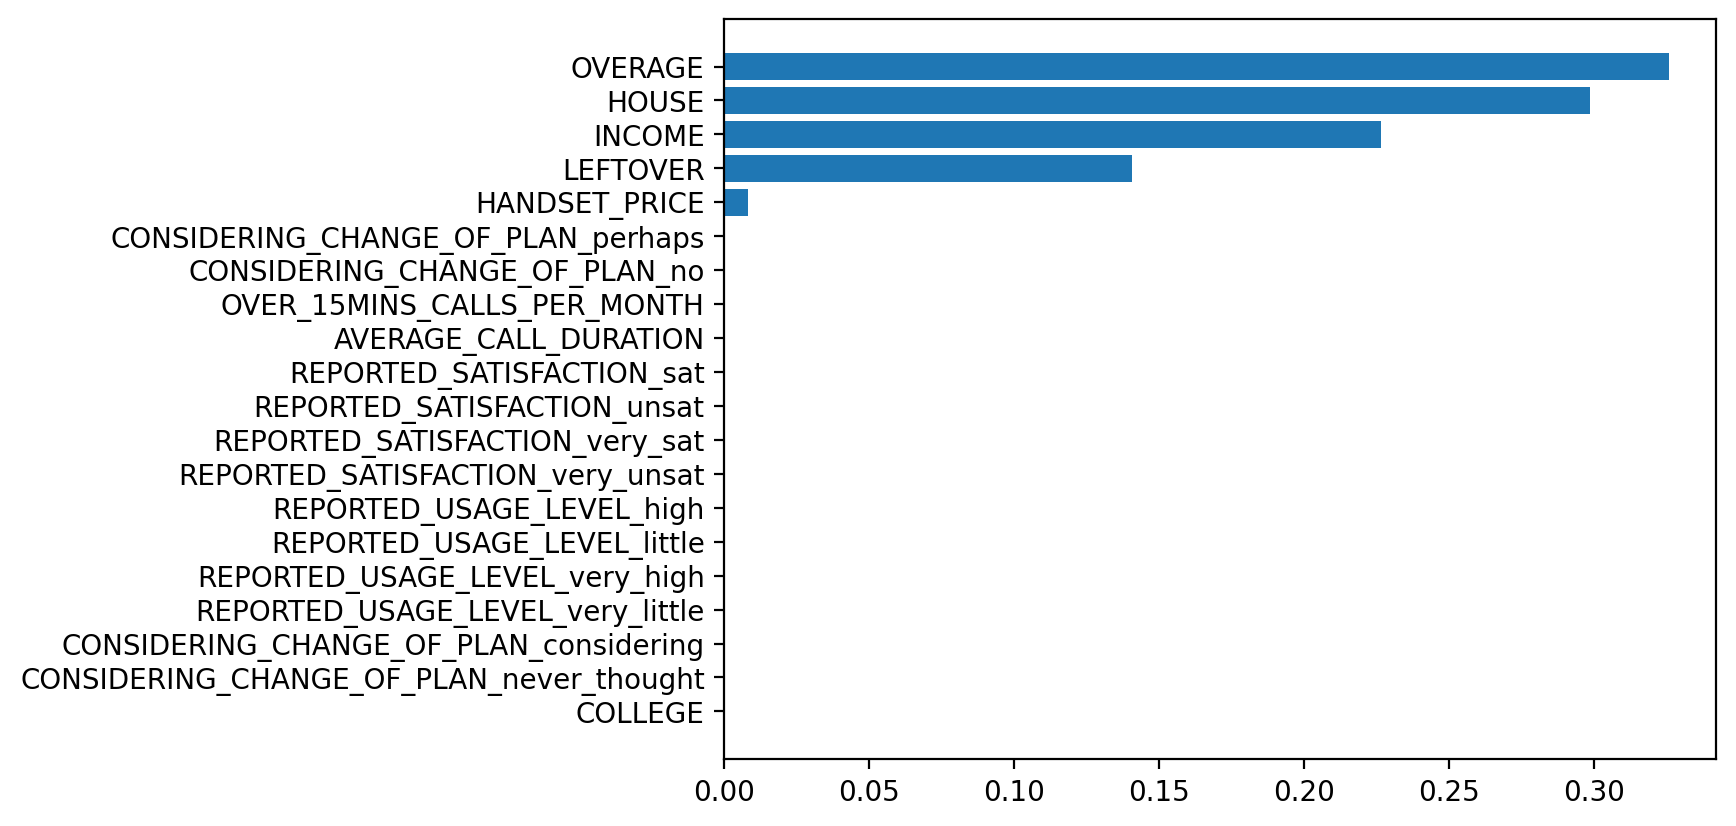

In [41]:
# 변수 중요도
df = pd.DataFrame()
df['width'] = model.best_estimator_.feature_importances_
df['y'] = list(x)
df.sort_values(by='width', inplace=True)

plt.barh(df['y'], df['width'])
plt.show()

# 6. 성능 평가

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수는 없겠지요?

In [32]:
# 예측하기
y_pred = model.predict(x_test)

In [34]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1930 1135]
 [ 646 2289]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      3065
           1       0.67      0.78      0.72      2935

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000

